### CSE-221710304062-Vaishnavi.B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
data.shape

(1340, 7)

In [4]:
data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [7]:
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [8]:
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [101]:
data.ATTORNEY.value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

In [9]:
#Creating userdefined function for imputing missing values with mode(numerical & categorical)
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [14]:
#Split the dataset into input and output--> Train and test
X = data.drop(['ATTORNEY'],axis=1)
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [16]:
y = data.ATTORNEY
y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(938, 5)
(402, 5)
(938,)
(402,)


In [111]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36,metric='euclidean')
knn.fit(X_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

In [112]:
# Predictions on the data
y_train_pred = knn.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [113]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.66      0.70       547
           1       0.68      0.75      0.71       525

    accuracy                           0.71      1072
   macro avg       0.71      0.71      0.70      1072
weighted avg       0.71      0.71      0.70      1072



In [114]:
from sklearn.metrics import accuracy_score
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 40):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    pred_test = knn_model.predict(X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores

[0.6417910447761194,
 0.6455223880597015,
 0.664179104477612,
 0.6567164179104478,
 0.6716417910447762,
 0.7089552238805971,
 0.6828358208955224,
 0.6977611940298507,
 0.7126865671641791,
 0.7164179104477612,
 0.7089552238805971,
 0.7089552238805971,
 0.7089552238805971,
 0.7126865671641791,
 0.7238805970149254,
 0.7126865671641791,
 0.7164179104477612,
 0.7201492537313433,
 0.7276119402985075,
 0.7238805970149254,
 0.7313432835820896,
 0.7313432835820896,
 0.7238805970149254,
 0.7201492537313433,
 0.7201492537313433,
 0.7276119402985075,
 0.7313432835820896,
 0.7313432835820896,
 0.7350746268656716,
 0.746268656716418,
 0.753731343283582,
 0.7425373134328358,
 0.746268656716418,
 0.746268656716418,
 0.746268656716418,
 0.746268656716418,
 0.7350746268656716,
 0.7425373134328358,
 0.7350746268656716]

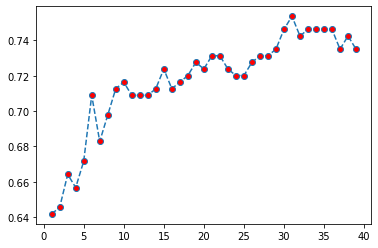

In [115]:
# Plot of K values and scores
plt.plot(range(1,40), scores, marker='o', markerfacecolor='r', linestyle='--')

In [116]:
#  Optimum k value is 33
final_model = KNeighborsClassifier(n_neighbors=33, metric='euclidean')
final_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [117]:
#Prediction on training data
final_train_pred = final_model.predict(X_train)
final_train_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

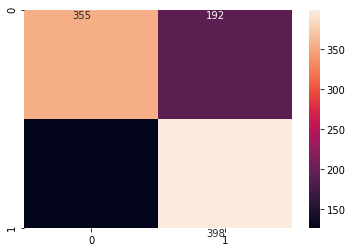

In [118]:
from sklearn.metrics import confusion_matrix;
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot=True, fmt='d', annot_kws={'va':'top', 'ha':'right'})

In [120]:
# Classification report
print(classification_report(y_train, final_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       547
           1       0.67      0.76      0.71       525

    accuracy                           0.70      1072
   macro avg       0.71      0.70      0.70      1072
weighted avg       0.71      0.70      0.70      1072



In [121]:
# Predictions on Test Data
final_test_pred = final_model.predict(X_test)
final_test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

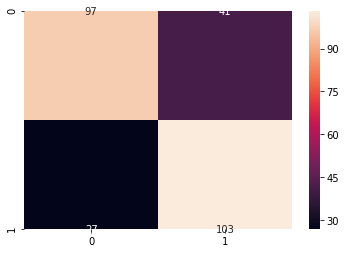

In [122]:
# compare actual values of test data(y_test) and final_test_pred(model predicted values)
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')

In [123]:
# Classification Report for Test Data
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       138
           1       0.72      0.79      0.75       130

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268



In [124]:
y_test_prob = final_model.predict_proba(X_test)
y_test_prob = pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,0.545455,0.454545
1,0.303030,0.696970
2,0.484848,0.515152
3,0.454545,0.545455
4,0.363636,0.636364
...,...,...
263,0.212121,0.787879
264,0.545455,0.454545
265,0.242424,0.757576
266,0.666667,0.333333


In [125]:
y_test

1072    0
1073    1
1074    0
1075    0
1076    0
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 268, dtype: int64

### Plot the ROC Curve for the model and find the AUC


In [126]:
#1-->hiring 0-->not hiring
# Roc curve
## TPR, FPR, Threshold
from sklearn.metrics import roc_auc_score, roc_curve
hiring_prob = final_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, hiring_prob)

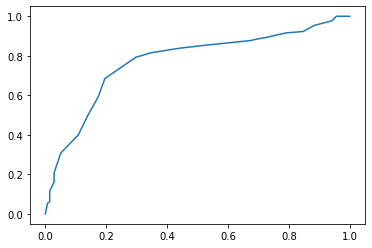

In [127]:
plt.plot(fpr, tpr)

In [128]:
roc_auc_score(y_test, hiring_prob)

0.7726867335562988

In [129]:
#KFold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
kfold.get_n_splits(X, y)

5

In [130]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
# model will bbuilt for 5 times--> for loop
# some set of indicies will be in test data() and remaining indices will be in training data
# In each and every fold, it is splitting training data and testing data

score = []
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # pass the X_train, y_train into the knn algorithm
    model_knn.fit(X_train, y_train)
    
    #predict the model on test data(X_test, y_test)
    y_pred_test = model_knn.predict(X_test)
    
    # accuracy score of predicted values(y_pred_test) and A.V(y_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    score.append(accuracy)

print(score)
print('Average Score of the model:',np.mean(score))

[0.6604477611940298, 0.6753731343283582, 0.6492537313432836, 0.6828358208955224, 0.6828358208955224]
Average Score of the model: 0.6701492537313433


### Compare the AUC of KNN Model with Logistic Regression Model and find which Model has higher AUC


In [157]:
# Build the classifier on training data
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
final_model1 = reg.fit(X_train,y_train) # I/p and o/p will be passed to the fit method
final_model1

C:\Users\Vaishnavi Batchu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
y_test_pred1 = reg.predict(X_test)
y_test_pred1

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

In [170]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_test_pred1)
conf

array([[ 89,  49],
       [ 26, 104]], dtype=int64)

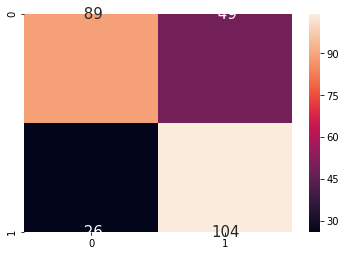

In [171]:
sns.heatmap(confusion_matrix(y_test,y_test_pred1), annot=True, fmt='3.0f',annot_kws={'size':'15'})

In [172]:
# Classification Report for Test Data
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       138
           1       0.68      0.80      0.73       130

    accuracy                           0.72       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.73      0.72      0.72       268



In [173]:
y_test_prob1 = final_model1.predict_proba(X_test)
y_test_prob1 = pd.DataFrame(y_test_prob1)
y_test_prob1

,0,1
0,0.510233,0.489767
1,0.503948,0.496052
2,0.479260,0.520740
3,0.425497,0.574503
4,0.342091,0.657909
...,...,...
263,0.418508,0.581492
264,0.547963,0.452037
265,0.304116,0.695884
266,0.662459,0.337541


In [174]:
y_test

1072    0
1073    1
1074    0
1075    0
1076    0
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 268, dtype: int64

In [177]:
from sklearn.metrics import roc_auc_score, roc_curve
hiring_prob1 = final_model1.predict_proba(X_test)[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, hiring_prob1)

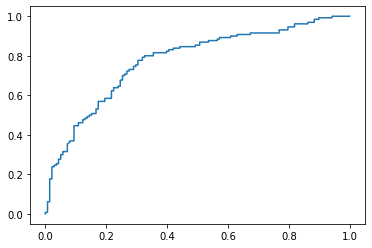

In [178]:
plt.plot(fpr1, tpr1)

In [180]:
roc_auc_score(y_test, hiring_prob1)

0.7752787068004459

### LogisticRegression model has higher AUC value .